<a href="https://colab.research.google.com/github/DJARDO-ISAAC/Hamoye-Stage-E/blob/main/Time_Series_(Stage_E)_checkpoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np


df=pd.read_csv( "C://Users//D-IKE//Desktop//HamoyeCODES//StageE//Time_series_analysis_and_forecast_DATASET.csv" )
df.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [ ]:
#Converting FullDate to datetime format,setting it as index
df['FullDate'] = pd.to_datetime(df['FullDate'])
df.set_index('FullDate', inplace = True)
df.head()

,Tmax,SysLoad,GasPrice,ElecPrice
FullDate,,,,
2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [ ]:
#Checking values that are missing 
df.isnull().sum()

Tmax         0
SysLoad      0
GasPrice     0
ElecPrice    0
dtype: int64

In [ ]:
df.describe()

,Tmax,SysLoad,GasPrice,ElecPrice
count,92016.000000,92016.000000,92016.000000,92016.000000
mean,231.696688,797.623357,6.016163,65.798356
std,4562.128748,613.520156,2.608116,213.144084
min,9.900000,-1596.810100,0.000000,-924.820000
25%,17.300000,417.119800,3.936900,31.543750
50%,21.900000,856.467925,5.165600,48.715000
75%,27.600000,1221.293675,8.023300,76.495000
max,99999.900000,3264.166300,29.990000,14700.000000


In [ ]:
#downsample data to daily data points
df_daily = df.resample('M').mean()
#df.index = pd.to_datetime(df.index)
#df_daily.index = df.resample('D').sum()
df_daily.head()
df_daily.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1 entries, 1970-01-31 to 1970-01-31
Freq: M
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Tmax       1 non-null      float64
 1   SysLoad    1 non-null      float64
 2   GasPrice   1 non-null      float64
 3   ElecPrice  1 non-null      float64
dtypes: float64(4)
memory usage: 40.0 bytes


In [ ]:
#Augmented Dickey-Fuller test for stationarity
from statsmodels.tsa.stattools import adfuller
result = adfuller(df_daily['GasPrice'])
print(f'ADF Statistic = {result[0]}')
print(f'p-value of SysLoad to 6 decimal places = {round(result[1], 6)}')
print('critical values are: ')
for k, v in result[4].items():
    print(f'{k} : {v}')

ADF Statistic = -1.7019939817424
p-value of SysLoad to 6 decimal places = 0.430085
critical values are: 
1% : -3.485585145896754
5% : -2.885738566292665
10% : -2.5796759080663887


In [ ]:
result = adfuller(df_daily['ElecPrice'])
print(f'ADF Statistic = {result[0]}')
print(f'p-value = {round(result[1], 6)}')
print(f'Number of lags used = {result[2]}')
print(f'Number of Observations = {result[3]}')
print('critical values are: ')
for k, v in result[4].items():
    print(f'{k} : {v}')

ADF Statistic = -3.8539708618723143
p-value = 0.002401
Number of lags used = 1
Number of Observations = 124
critical values are: 
1% : -3.484219653271961
5% : -2.885145235641637
10% : -2.579359138917794


In [ ]:
#Reset index and create a new data set
df_daily_copy = df_daily.copy().reset_index()
df_daily_copy = df_daily_copy[['FullDate', 'ElecPrice']].rename(columns = {'FullDate' : 'ds', 'ElecPrice' : 'y'})
df_daily_copy.head()

,ds,y
0,2010-09-30,25.075896
1,2010-10-31,22.223629
2,2010-11-30,22.575944
3,2010-12-31,17.585753
4,2011-01-31,103.094603


In [ ]:
#Split dataset into train(first 2757) and test (x-2757), where x = length of dataset
x_train, x_test = df_day_copy[:2757], df_day_copy[2757:]
y_train, y_test = df_day_copy.y[:2757], df_day_copy.y[2757:]

In [ ]:
#Training model using the Facebook Prophet module
from prophet import Prophet
model = Prophet()
model.fit(x_train)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\D-IKE\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [ ]:
#Predicting using the length of test dataset
future = model.make_future_dataframe(len(x_test), freq = 'D')
forecast = model.predict(future)
forecast.head()

C:\Users\D-IKE\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\D-IKE\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-09-30,38.578462,-14.639261,66.049109,38.578462,38.578462,-10.432900,-10.432900,-10.432900,-10.432900,-10.432900,-10.432900,0.0,0.0,0.0,28.145561
1,2010-10-31,39.101208,-12.658878,68.660012,39.101208,39.101208,-12.536855,-12.536855,-12.536855,-12.536855,-12.536855,-12.536855,0.0,0.0,0.0,26.564352
2,2010-11-30,39.607091,-12.608631,69.009692,39.607091,39.607091,-11.714816,-11.714816,-11.714816,-11.714816,-11.714816,-11.714816,0.0,0.0,0.0,27.892275
3,2010-12-31,40.129837,-9.667673,73.034593,40.129837,40.129837,-6.774611,-6.774611,-6.774611,-6.774611,-6.774611,-6.774611,0.0,0.0,0.0,33.355226
4,2011-01-31,40.652583,20.736057,101.939426,40.652583,40.652583,21.249663,21.249663,21.249663,21.249663,21.249663,21.249663,0.0,0.0,0.0,61.902246


C:\Users\D-IKE\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


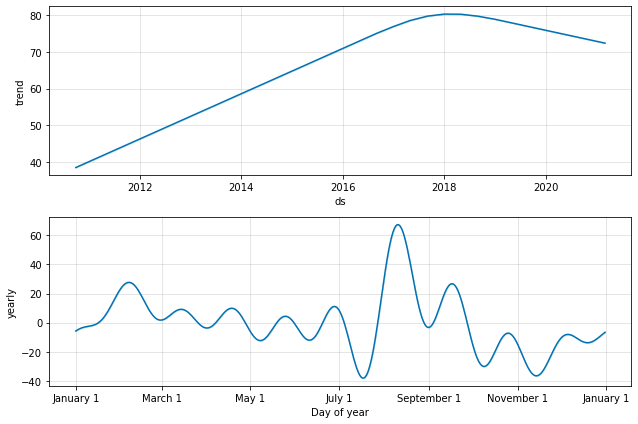

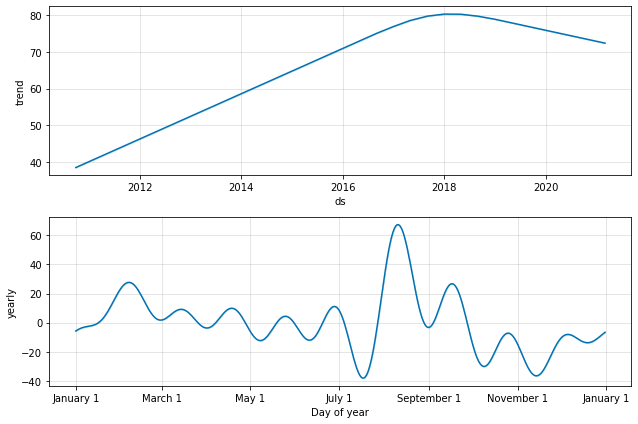

In [ ]:
model.plot_components(forecast)

In [ ]:
#Second training of model using regressors 
df_reg = df_daily.copy().reset_index()
df_reg = df_reg.rename(columns = {'FullDate' : 'ds', 'ElecPrice' : 'y', 'SysLoad' : 'add1', 'Tmax' : 'add2', 'GasPrice' : 'add3'})
df_reg.head()

,ds,add2,add1,add3,y
0,2010-09-30,16.906667,1578.145819,3.578663,25.075896
1,2010-10-31,21.377419,1398.027708,2.799987,22.223629
2,2010-11-30,24.323333,1484.759104,2.321943,22.575944
3,2010-12-31,26.696774,1082.167586,2.401429,17.585753
4,2011-01-31,30.629032,1331.477822,2.917977,103.094603


In [ ]:
#Split dataset as done previously
df_reg_train, df_reg_test = df_reg[:2757], df_reg[2757:]
df_reg_y_train, df_reg_y_test = df_reg.y[:2757], df_reg.y[2757:]
df_reg_train.isnull().sum()

ds      0
add2    0
add1    0
add3    0
y       0
dtype: int64

In [ ]:
#Training model while adding the regressors into the dataset
model_reg = Prophet()
model_reg.add_regressor('add1')
model_reg.add_regressor('add2')
model_reg.add_regressor('add3')
model_reg.fit(df_reg_train)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\D-IKE\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [ ]:
future_reg = model_reg.make_future_dataframe(periods = len(df_reg_test), freq = 'D')
future_reg['add1'] = df_reg_train['add1']
future_reg['add2'] = df_reg_train['add2']
future_reg['add3'] = df_reg_train['add3']
future_reg

,ds,add1,add2,add3
0,2010-09-30,1578.145819,16.906667,3.578663
1,2010-10-31,1398.027708,21.377419,2.799987
2,2010-11-30,1484.759104,24.323333,2.321943
3,2010-12-31,1082.167586,26.696774,2.401429
4,2011-01-31,1331.477822,30.629032,2.917977
...,...,...,...,...
121,2020-10-31,123.116935,21.374194,5.571003
122,2020-11-30,20.694651,27.986667,6.032180
123,2020-12-31,-47.401751,25.525806,6.333106
124,2021-01-31,64.803990,27.896774,6.411629


C:\Users\D-IKE\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\D-IKE\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\D-IKE\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


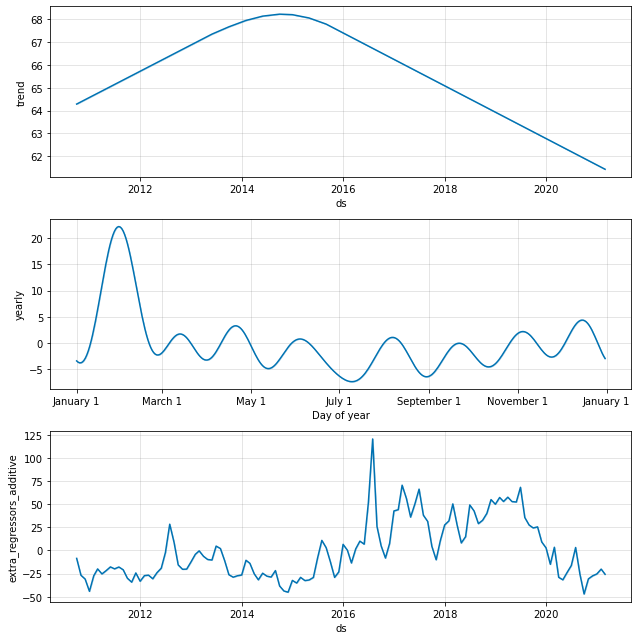

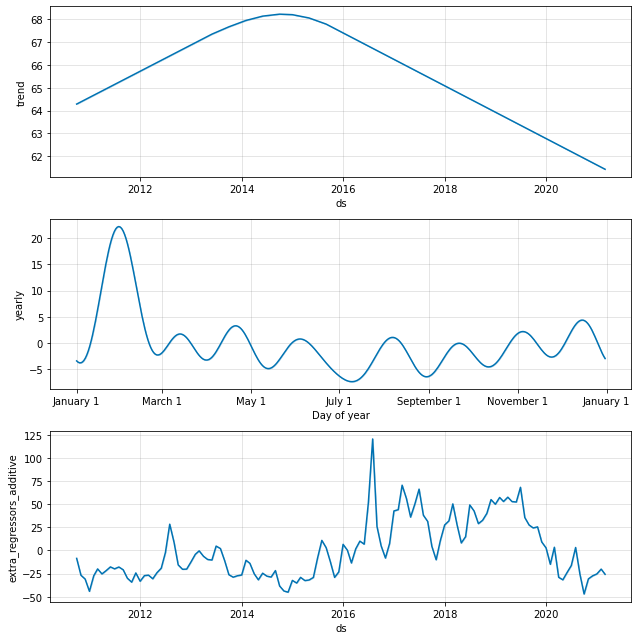

In [ ]:
forwardfill_future_reg = future_reg.fillna(method='ffill')
forwardfill_forecast_reg = model_reg.predict(forwardfill_future_reg)
model_reg.plot_components(forwardfill_forecast_reg)

In [ ]:
#Third model training with regressors SysLoad(add1) and GasPrice(add3)
df_reg2 = df_daily.copy().reset_index()
df_reg2 = df_reg2.rename(columns = {'FullDate' : 'ds', 'ElecPrice' : 'y', 'SysLoad' : 'add1', 'Tmax' : 'add2', 'GasPrice' : 'add3'})

In [ ]:
#Splitting data into train and test
df_reg2_train, df_reg2_test = df_reg2[:2757], df_reg2[2757:]
df_reg2_train_y, df_reg2_test_y = df_reg.y[:2757], df_reg.y[2757:]

In [ ]:
#Training using Prophet and adding the two regressors
model_reg2 = Prophet()
model_reg2.add_regressor('add1')
model_reg2.add_regressor('add3')
model_reg2.fit(df_reg2_train)
future_reg2 = model_reg2.make_future_dataframe(len(df_reg_test), freq = 'D')
future_reg2['add1'] = df_reg2_train['add1']
future_reg2['add3'] = df_reg2_train['add3']
future_reg2 = future_reg2.fillna(method='ffill')
#Predict for the next 12 months
forecast_reg2 = model_reg2.predict(future_reg2)
forecast_reg2

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\D-IKE\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\D-IKE\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\D-IKE\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,add1,add1_lower,add1_upper,add3,...,extra_regressors_additive,extra_regressors_additive_lower,extra_regressors_additive_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-09-30,64.307588,28.693442,79.793201,64.307588,64.307588,28.036426,28.036426,28.036426,-36.664158,...,-8.627732,-8.627732,-8.627732,-1.446268,-1.446268,-1.446268,0.0,0.0,0.0,54.233588
1,2010-10-31,64.405406,13.637123,64.519168,64.405406,64.405406,21.561111,21.561111,21.561111,-48.378178,...,-26.817067,-26.817067,-26.817067,1.401038,1.401038,1.401038,0.0,0.0,0.0,38.989377
2,2010-11-30,64.500068,8.041249,57.089213,64.500068,64.500068,24.679138,24.679138,24.679138,-55.569632,...,-30.890494,-30.890494,-30.890494,-1.804491,-1.804491,-1.804491,0.0,0.0,0.0,31.805084
3,2010-12-31,64.597887,-6.507970,41.953755,64.597887,64.597887,10.205818,10.205818,10.205818,-54.373888,...,-44.168070,-44.168070,-44.168070,-3.302003,-3.302003,-3.302003,0.0,0.0,0.0,17.127813
4,2011-01-31,64.695705,33.979814,85.058454,64.695705,64.695705,19.168617,19.168617,19.168617,-46.603190,...,-27.434573,-27.434573,-27.434573,22.402532,22.402532,22.402532,0.0,0.0,0.0,59.663664
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,2020-10-31,61.749949,7.517177,58.671294,61.749949,61.749949,-24.272423,-24.272423,-24.272423,-6.692383,...,-30.964805,-30.964805,-30.964805,1.517971,1.517971,1.517971,0.0,0.0,0.0,32.303114
122,2020-11-30,61.654100,6.006151,58.465295,61.654100,61.654100,-27.954543,-27.954543,-27.954543,0.245333,...,-27.709211,-27.709211,-27.709211,-1.594517,-1.594517,-1.594517,0.0,0.0,0.0,32.350373
123,2020-12-31,61.555057,6.257386,57.717355,61.555057,61.555057,-30.402635,-30.402635,-30.402635,4.772321,...,-25.630314,-25.630314,-25.630314,-3.512842,-3.512842,-3.512842,0.0,0.0,0.0,32.411901
124,2021-01-31,61.456014,39.643627,86.941355,61.456014,61.456014,-26.368796,-26.368796,-26.368796,5.953576,...,-20.415220,-20.415220,-20.415220,22.319888,22.319888,22.319888,0.0,0.0,0.0,63.360683


In [ ]:
#Measuring model without regressor performance using MAPE, RMSE
import numpy as np
def mape(actual, predicted):
  actual, predicted = np.array(actual), np.array(predicted)
  return np.mean(np.abs((actual - predicted) / actual)) * 100
actual = y_train
predicted = forecast['yhat'][:2757]
mape(actual, predicted)

43.92713110156283

In [ ]:
import sklearn
from sklearn.metrics import mean_squared_error
import math
from math import sqrt

actual = y_train
predicted = forecast['yhat'][:2757]

mse = sklearn.metrics.mean_squared_error(actual, predicted)

rmse = math.sqrt(mse)

print(rmse)

31.11975456656623


In [ ]:
#Measuring regressor model using MAPE and RMSE
def mape(actual, pred):
  actual, pred = np.array(actual), np.array(pred)
  return np.mean(np.abs((actual - pred) / actual)) * 100
actual_reg = df_reg_y_train
pred_reg = forwardfill_forecast_reg['yhat'][:2757]
mape(actual_reg, pred_reg)

25.685391562942872

In [ ]:
actual_reg = y_train
predicted_reg = forwardfill_forecast_reg['yhat'][:2757]

mse = sklearn.metrics.mean_squared_error(actual_reg, pred_reg)

rmse = math.sqrt(mse)

print(rmse)

19.838656251201485


In [ ]:
#Measuring performance of Model without Tmax
def mape(actual, pred):
  actual, pred = np.array(actual), np.array(pred)
  return np.mean(np.abs((actual - pred) / actual)) * 100
actual_reg2 = df_reg2_train_y
pred_reg2 = forecast_reg2['yhat'][:2757]
mape(actual_reg2, pred_reg2)

25.641790089799272

In [ ]:
actual_reg2 = df_reg2_train_y
pred_reg2 = forecast_reg2['yhat'][:2757]

mse = sklearn.metrics.mean_squared_error(actual_reg2, pred_reg2)

rmse = math.sqrt(mse)

print(rmse)

19.862148853154025
